# Shopping Mall Customer Segmentation
Unsupervised Machine Learning Project<br>
[<font color='blue'>Ted Dickey</font>](https://teddickey.com)

- Problem Statement: Analyze customer behavior in a shopping mall to identify target customers who are more likely to be easily influenced, enabling effective marketing strategies and improved customer engagement.
- Criteria: You want to identify the most important shopping groups based on income, age, and shopping score.
  
- Objective: Market Segmentation  -- Divide mall target market into appropriate groups based on demographic  and behavioral factors to better understand the target for marketing activities.

- **The Approach**
    - Perform Exploratory Data Analysis
    - Use KMEANS Clustering Algorithm to create segments
    - Use Summary Statistics on the clusters
    - Visualize the Results

Advantages of Customer Segmentation:
- Price Optimization
- Enhanced Competitiveness
- Brand Awareness
- Acquisition & Reputation
- Increased Revenue and ROI

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

## Data Preprocessing


In [25]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [26]:
df.rename(columns={'Genre':'Gender','Spending Score (1-100)':'Spending Score'},inplace=True)

In [27]:
df.shape

(200, 5)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Gender              200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual Income (k$)  200 non-null    int64 
 4   Spending Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [30]:
df.dtypes

CustomerID             int64
Gender                object
Age                    int64
Annual Income (k$)     int64
Spending Score         int64
dtype: object

In [31]:
df.isnull().sum()

CustomerID            0
Gender                0
Age                   0
Annual Income (k$)    0
Spending Score        0
dtype: int64

In [32]:
df.drop(['CustomerID'], axis=1, inplace=True)


In [33]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## EDA

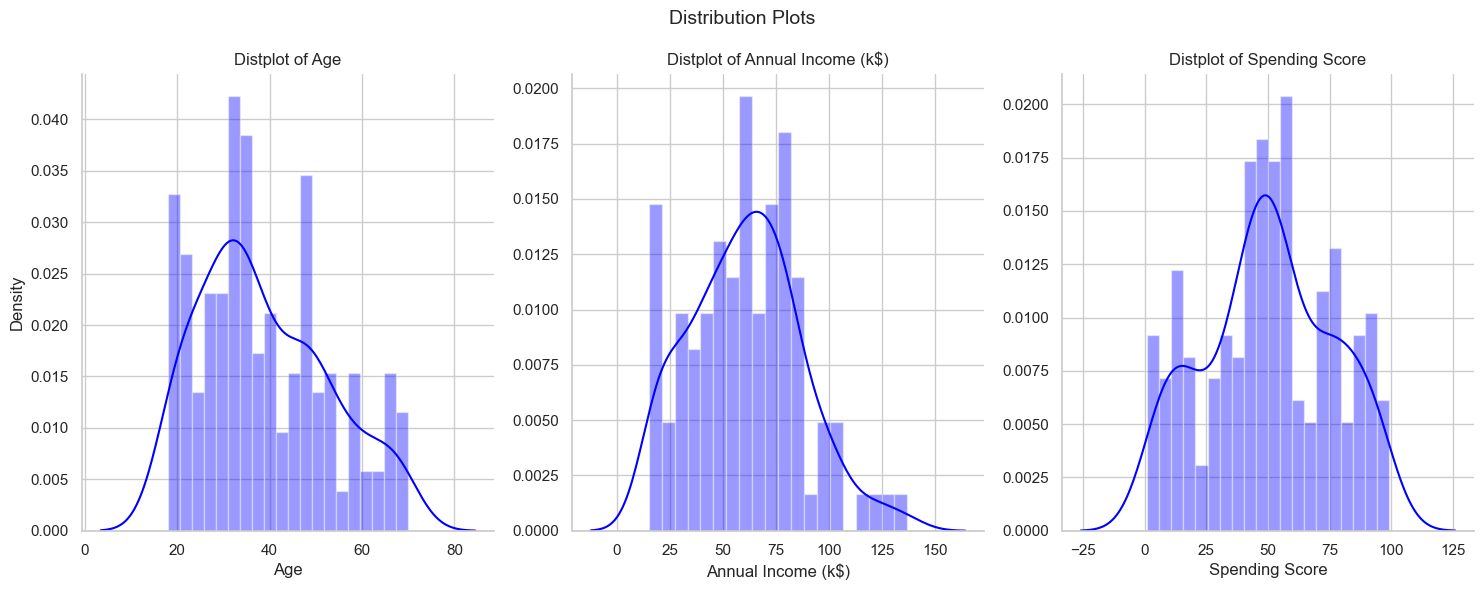

In [35]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score']
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

for n, column in enumerate(columns):
    sns.distplot(df[column], bins = 20, ax=axes[n], kde=True, color='blue')
    sns.despine()
    #sns.set_style('white')
    axes[n].set_title('Distplot of {}'.format(column))

    # Remove y-axis labels for all subplots except the first one
    if n != 0:
        axes[n].set_ylabel('')

# Set y-axis label for the first subplot
axes[0].set_ylabel("Density")

plt.suptitle("Distribution Plots", fontsize=14)
plt.tight_layout()
plt.show()

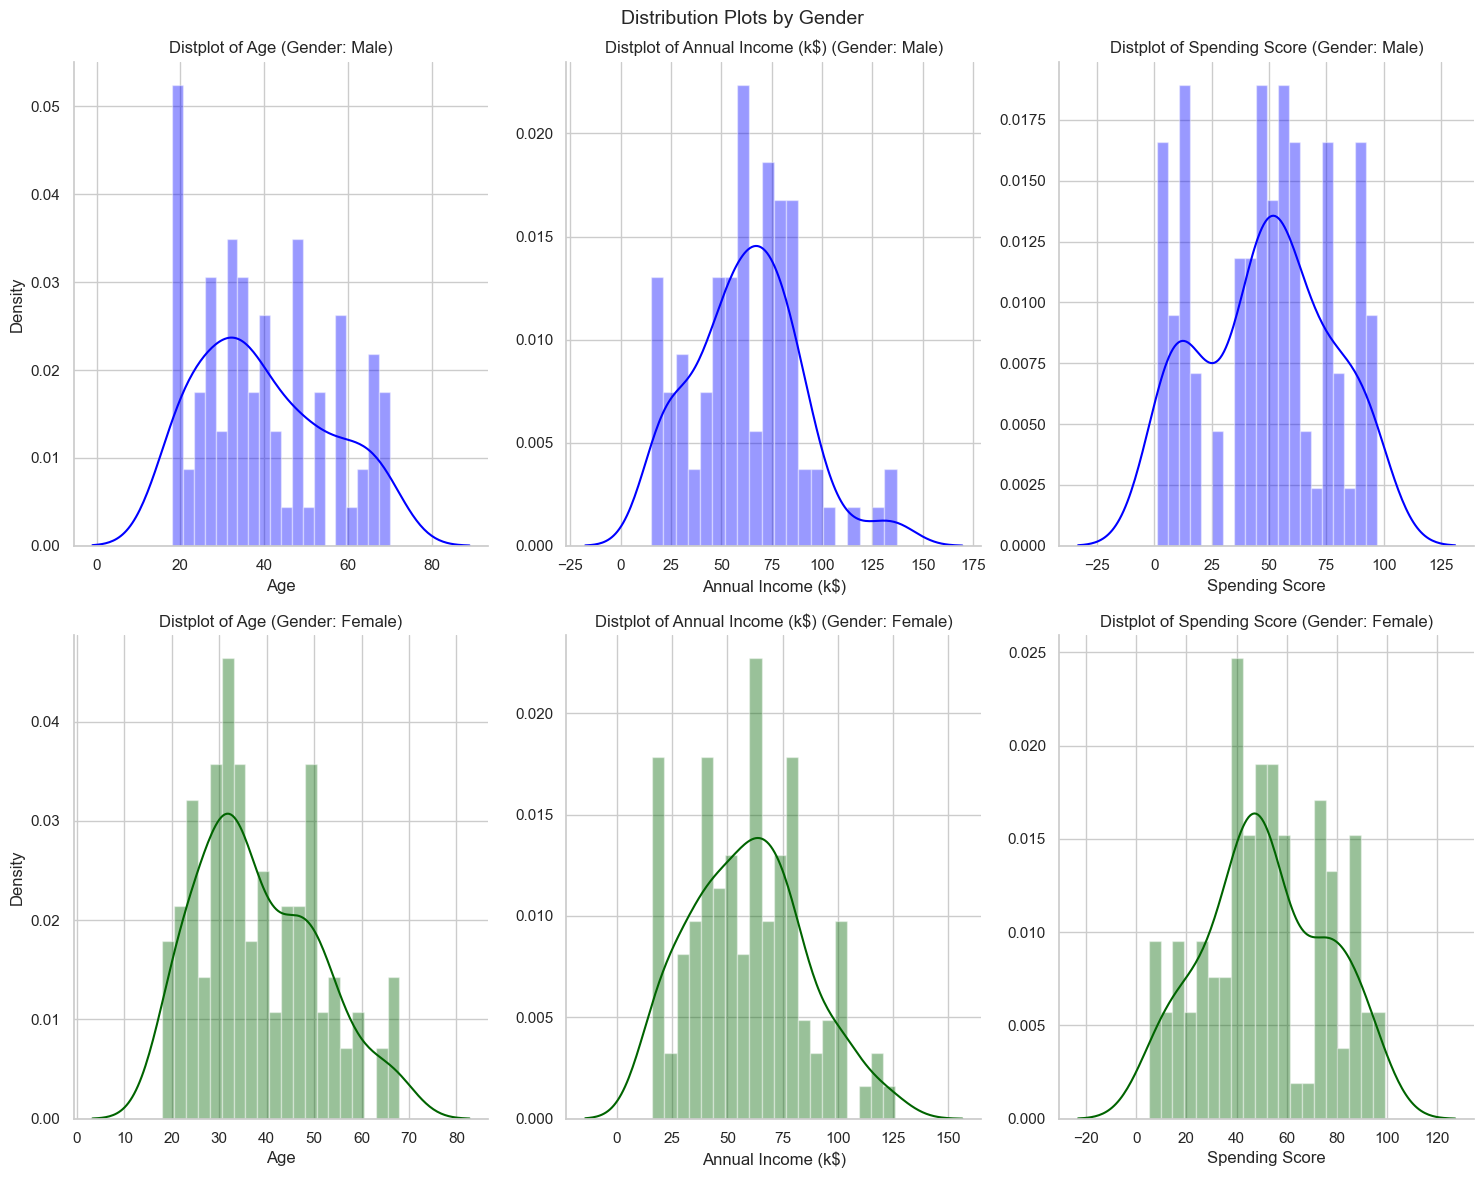

In [37]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score']
genders = df['Gender'].unique()
colors = ['blue', 'darkgreen']

# Create subplots for each gender
fig, axes = plt.subplots(len(genders), len(columns), figsize=(15, 6 * len(genders)))

for i, gender in enumerate(genders):
    for j, column in enumerate(columns):
        ax = axes[i, j]
        data = df[df['Gender'] == gender]
        sns.distplot(data[column], bins=20, ax=ax, kde=True, color=colors[i])
        sns.despine()
        ax.set_title('Distplot of {} (Gender: {})'.format(column, gender))

        # Remove y-axis labels for all subplots except the first one
        if j != 0:
            ax.set_ylabel('')

# Set y-axis label for the first subplot of each gender
for ax in axes[:, 0]:
    ax.set_ylabel("Density")

plt.suptitle("Distribution Plots by Gender", fontsize=14)
plt.tight_layout()
plt.show()


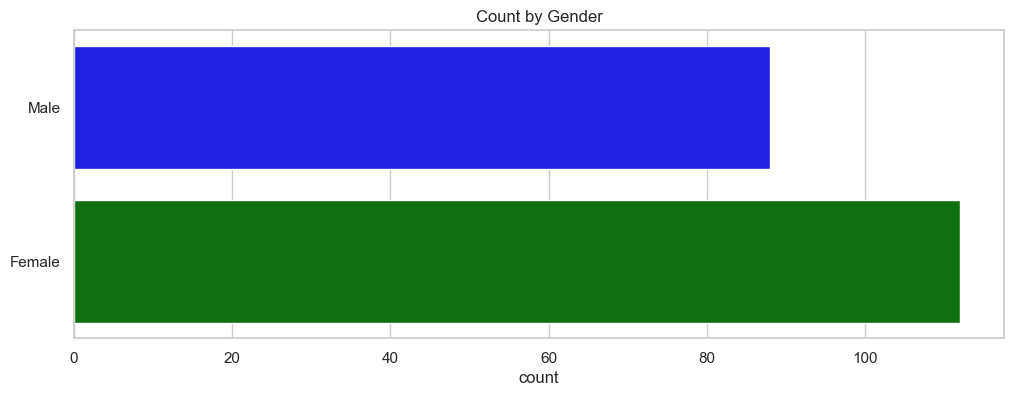

In [38]:
plt.figure(figsize=(12, 4))
sns.countplot(df, y='Gender',  palette={'Male': 'blue', 'Female': 'green'})
plt.ylabel('')
plt.title('Count by Gender')
plt.show()

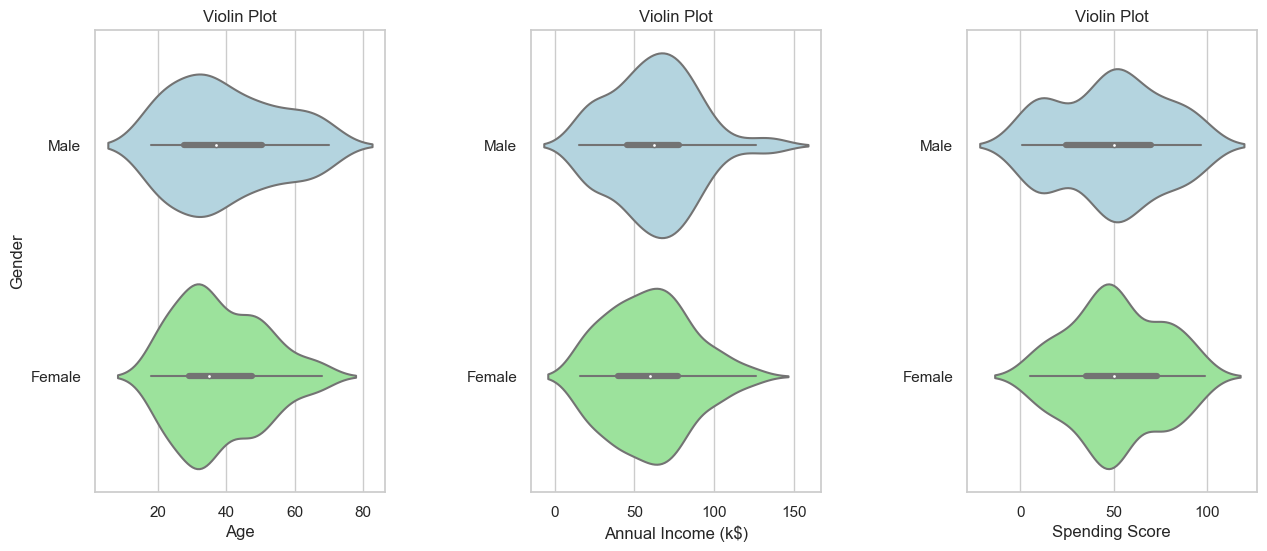

In [40]:
plt.figure(figsize=(15, 6))
n=0
for cols in ['Age', 'Annual Income (k$)', 'Spending Score']:
    n+=1
    plt.subplot(1, 3, n)    
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.violinplot(x = cols, y = 'Gender', data = df, palette={'Male': 'lightblue', 'Female': 'lightgreen'})
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Violin Plot')

plt.show()






We can see that there is a high density around age 30ish for females as compared to males. Annual income is similar for both males and females around 65kish. Density of Spending score is similar for both genders, as well.

In [41]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score']
for i in columns:
    plt.figure()
    sns.kdeplot(df[i],shade=True, hue=df['Gender'])

ValueError: The following variable cannot be assigned with wide-form data: `hue`

<Figure size 640x480 with 0 Axes>

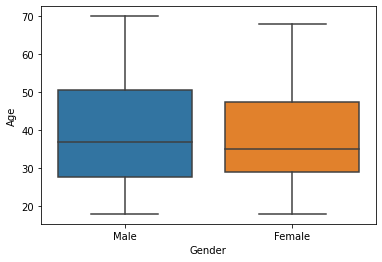

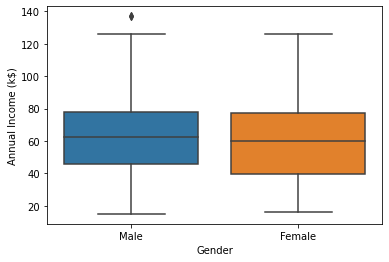

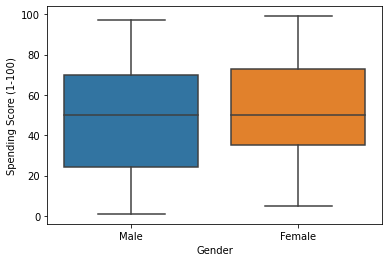

In [ ]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df, x= 'Gender', y=df[i])

In [42]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [43]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

# Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score'>

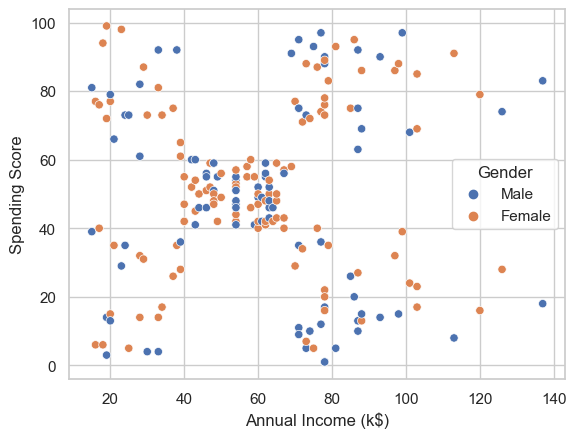

In [47]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score', hue='Gender' )

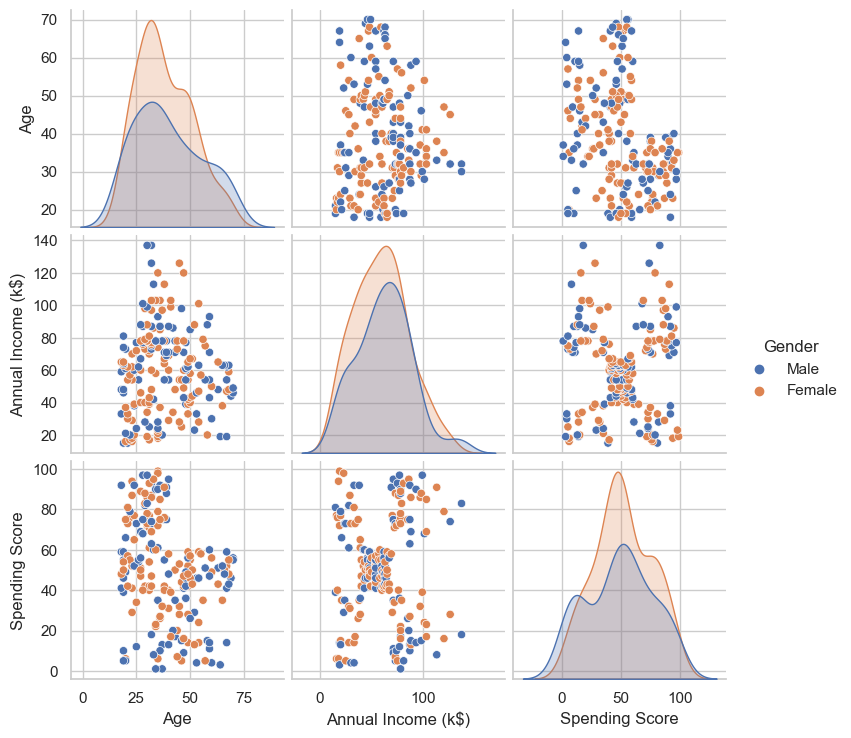

In [48]:
sns.pairplot(df, hue='Gender')

In [50]:
df.groupby(['Gender'])['Age', 'Annual Income (k$)',
                       'Spending Score'].mean()

,Age,Annual Income (k$),Spending Score
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [51]:
df.corr()

,Age,Annual Income (k$),Spending Score
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score,-0.327227,0.009903,1.000000


<Axes: >

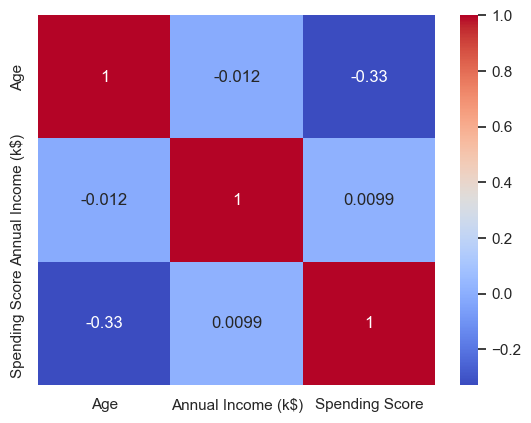

In [53]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

# Clustering - Univariate, Bivariate, Multivariate

In [54]:
clustering1 = KMeans(n_clusters=3)

In [55]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [56]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [57]:
df['Income Cluster'] = clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score,Income Cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


In [58]:
df['Income Cluster'].value_counts()

0    92
1    72
2    36
Name: Income Cluster, dtype: int64

In [59]:
clustering1.inertia_

23528.152173913055

# Elbow Method

In [60]:
intertia_scores=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    intertia_scores.append(kmeans.inertia_)
    

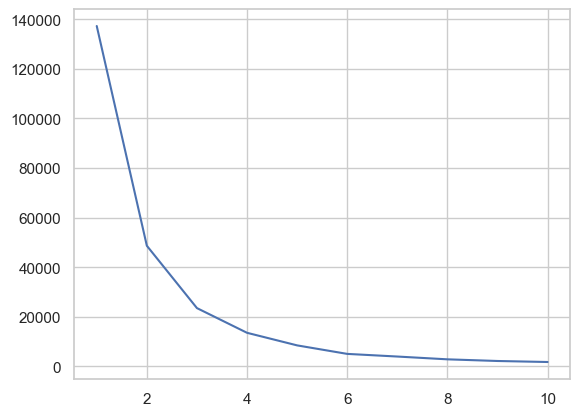

In [61]:
plt.plot(range(1,11), intertia_scores)

# Analysis

In [63]:
df.groupby('Income Cluster')['Age', 'Annual Income (k$)',
    'Spending Score'].mean()

,Age,Annual Income (k$),Spending Score
Income Cluster,,,
0,39.184783,66.717391,50.054348
1,38.930556,33.027778,50.166667
2,37.833333,99.888889,50.638889


# Bivariate Clustering

In [65]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score']])
df['Spending and Income Cluster'] =clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score,Income Cluster,Spending and Income Cluster
0,Male,19,15,39,1,4
1,Male,21,15,81,1,3
2,Female,20,16,6,1,4
3,Female,23,16,77,1,3
4,Female,31,17,40,1,4


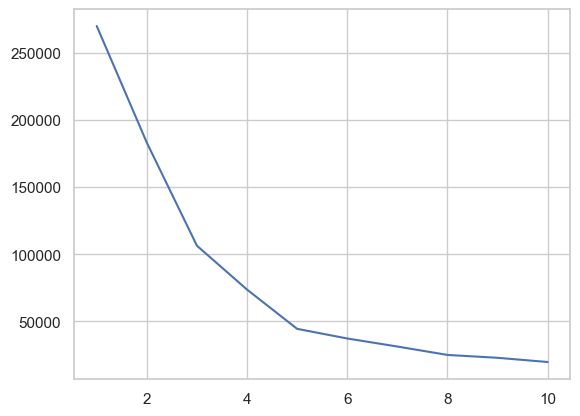

In [66]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score']])
    intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11), intertia_scores2)
    

In [67]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x', 'y']

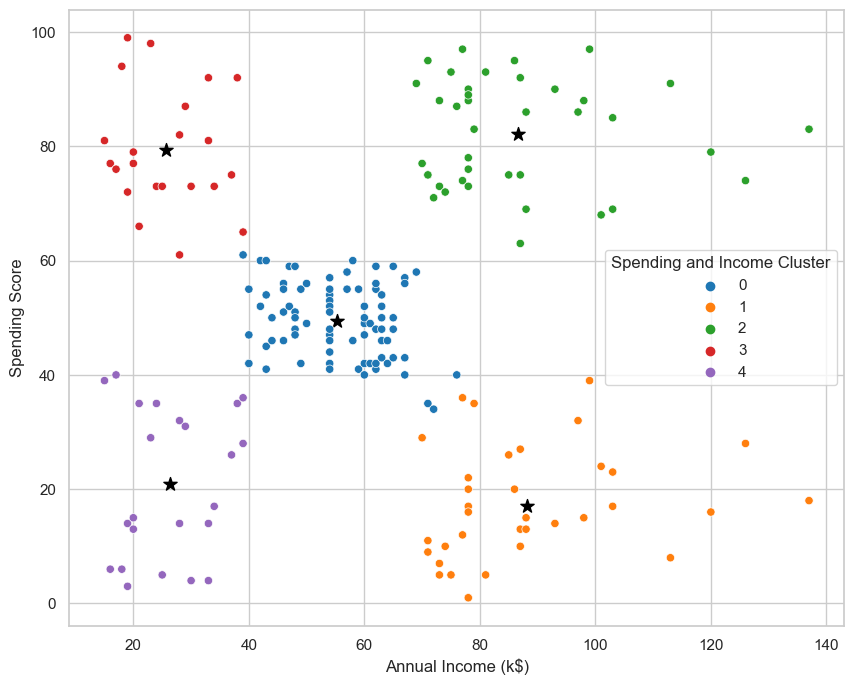

In [69]:
plt.figure(figsize=(10,8))
plt.scatter(x= centers['x'], y=centers['y'], s=100,c='black', marker='*')
sns.scatterplot(data=df, x= 'Annual Income (k$)',y='Spending Score', hue='Spending and Income Cluster', palette='tab10')
plt.savefig('clustering_bivariage.png')

In [70]:
pd.crosstab(df['Spending and Income Cluster'], df['Gender'], normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.592593,0.407407
1,0.457143,0.542857
2,0.538462,0.461538
3,0.590909,0.409091
4,0.608696,0.391304


In [72]:
df.groupby('Spending and Income Cluster')['Age', 'Annual Income (k$)',
    'Spending Score'].mean()

,Age,Annual Income (k$),Spending Score
Spending and Income Cluster,,,
0,42.716049,55.296296,49.518519
1,41.114286,88.200000,17.114286
2,32.692308,86.538462,82.128205
3,25.272727,25.727273,79.363636
4,45.217391,26.304348,20.913043


In [73]:
#multivariate clustering
from sklearn.preprocessing import StandardScaler

In [74]:
scale = StandardScaler()

In [75]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score,Income Cluster,Spending and Income Cluster
0,Male,19,15,39,1,4
1,Male,21,15,81,1,3
2,Female,20,16,6,1,4
3,Female,23,16,77,1,3
4,Female,31,17,40,1,4


In [76]:
dff = pd.get_dummies(df, drop_first=True)
dff.head()

,Age,Annual Income (k$),Spending Score,Income Cluster,Spending and Income Cluster,Gender_Male
0,19,15,39,1,4,1
1,21,15,81,1,3,1
2,20,16,6,1,4,0
3,23,16,77,1,3,0
4,31,17,40,1,4,0


In [77]:
dff.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score', 'Income Cluster',
       'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [79]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score','Gender_Male']]

In [80]:
dff.head()

,Age,Annual Income (k$),Spending Score,Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [81]:
dff = scale.fit_transform(dff)

In [82]:
dff

array([[-1.42456879, -1.73899919, -0.43480148,  1.12815215],
       [-1.28103541, -1.73899919,  1.19570407,  1.12815215],
       [-1.3528021 , -1.70082976, -1.71591298, -0.88640526],
       [-1.13750203, -1.70082976,  1.04041783, -0.88640526],
       [-0.56336851, -1.66266033, -0.39597992, -0.88640526],
       [-1.20926872, -1.66266033,  1.00159627, -0.88640526],
       [-0.27630176, -1.62449091, -1.71591298, -0.88640526],
       [-1.13750203, -1.62449091,  1.70038436, -0.88640526],
       [ 1.80493225, -1.58632148, -1.83237767,  1.12815215],
       [-0.6351352 , -1.58632148,  0.84631002, -0.88640526],
       [ 2.02023231, -1.58632148, -1.4053405 ,  1.12815215],
       [-0.27630176, -1.58632148,  1.89449216, -0.88640526],
       [ 1.37433211, -1.54815205, -1.36651894, -0.88640526],
       [-1.06573534, -1.54815205,  1.04041783, -0.88640526],
       [-0.13276838, -1.54815205, -1.44416206,  1.12815215],
       [-1.20926872, -1.54815205,  1.11806095,  1.12815215],
       [-0.27630176, -1.

In [83]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


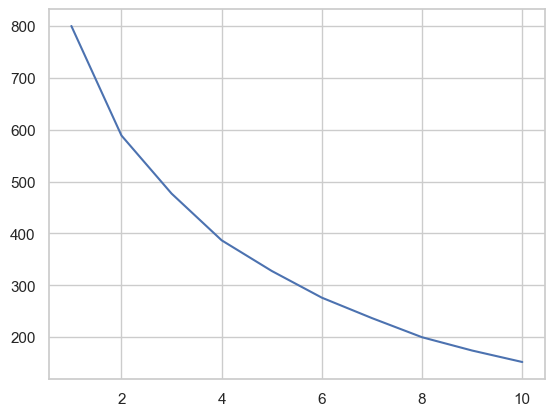

In [84]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3 = KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11), intertia_scores3)
    

In [85]:
df.to_csv('Clustering.csv')

## The End